In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *


from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [2]:
X = np.load('trackTrainImages_210624.npy')
y = np.load('trackPos_210624.npy')

print(X.shape)
print(y.shape)


(380, 224, 224, 3)
(380,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# split the training data into a training set and a validation set
X_train, X_valid = X_train[:-100], X_train[-100:]
y_train, y_valid = y_train[:-100], y_train[-100:]

In [7]:
# create the MLP model
inputs = Input(shape=(224,224,3))

conv2D_1 = Conv2D(filters=15,kernel_size=3,strides=1,activation='relu')(inputs)
maxPool_1 = MaxPooling2D(pool_size=2,strides=2)(conv2D_1)
batch_1 = BatchNormalization()(maxPool_1)


conv2D_2 = Conv2D(filters=15,kernel_size=2,strides=1,activation='relu')(batch_1)
maxPool_2 = MaxPooling2D(pool_size=2,strides=1)(conv2D_2)
batch_2 = BatchNormalization()(maxPool_2)

conv2D_3 = Conv2D(filters=15,kernel_size=3,strides=1,activation='relu')(batch_2)
maxPool_3 = MaxPooling2D(pool_size=2,strides=1)(conv2D_3)
batch_3 = BatchNormalization()(maxPool_3)

conv2D_4 = Conv2D(filters=15,kernel_size=3,strides=1,activation='relu')(batch_3)
maxPool_4 = MaxPooling2D(pool_size=2,strides=1)(conv2D_4)
batch_4 = BatchNormalization()(maxPool_4)


flat = Flatten()(batch_4)
dense_1 = Dense(units=64,activation='relu')(flat)
outputs = Dense(units=1,activation='linear')(dense_1)

model = keras.Model(inputs,outputs)


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 15)      420       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 15)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 15)      60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 15)      915       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 15)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 15)      60    

In [9]:
# comile the model unsing categorical_crossentropy loss function
model.compile(optimizer='nadam',loss='MSE',metrics=['mae', 'mse'])

In [10]:
# train the model using a mini batch size of 100 images and 50 epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=20,validation_data=[X_valid, y_valid])

Train on 204 samples, validate on 100 samples
Epoch 1/100
204/204 [==============================] - 14s 71ms/sample - loss: 9322.3266 - mae: 69.7746 - mse: 9322.3262 - val_loss: 13304.6914 - val_mae: 98.6728 - val_mse: 13304.6924
Epoch 2/100
204/204 [==============================] - 13s 61ms/sample - loss: 1560.3952 - mae: 28.1174 - mse: 1560.3953 - val_loss: 11160.6271 - val_mae: 89.6848 - val_mse: 11160.6279
Epoch 3/100
204/204 [==============================] - 13s 63ms/sample - loss: 447.5368 - mae: 15.2857 - mse: 447.5368 - val_loss: 8774.2145 - val_mae: 79.4234 - val_mse: 8774.2139
Epoch 4/100
204/204 [==============================] - 13s 63ms/sample - loss: 122.2846 - mae: 8.3556 - mse: 122.2846 - val_loss: 7350.0418 - val_mae: 72.6183 - val_mse: 7350.0420
Epoch 5/100
204/204 [==============================] - 13s 62ms/sample - loss: 121.2322 - mae: 7.9095 - mse: 121.2322 - val_loss: 5969.1752 - val_mae: 65.2764 - val_mse: 5969.1748
Epoch 6/100
204/204 [======================

Epoch 46/100
204/204 [==============================] - 13s 62ms/sample - loss: 249.0081 - mae: 3.5070 - mse: 249.0081 - val_loss: 2171.2791 - val_mae: 34.5195 - val_mse: 2171.2791
Epoch 47/100
204/204 [==============================] - 13s 62ms/sample - loss: 243.1823 - mae: 2.8944 - mse: 243.1823 - val_loss: 2080.4432 - val_mae: 33.6098 - val_mse: 2080.4431
Epoch 48/100
204/204 [==============================] - 13s 62ms/sample - loss: 242.6576 - mae: 3.0192 - mse: 242.6576 - val_loss: 1910.7398 - val_mae: 32.4592 - val_mse: 1910.7399
Epoch 49/100
204/204 [==============================] - 13s 62ms/sample - loss: 244.0308 - mae: 3.0973 - mse: 244.0307 - val_loss: 1939.3257 - val_mae: 32.5232 - val_mse: 1939.3257
Epoch 50/100
204/204 [==============================] - 13s 61ms/sample - loss: 245.2074 - mae: 3.2924 - mse: 245.2074 - val_loss: 1813.2082 - val_mae: 32.2029 - val_mse: 1813.2081
Epoch 51/100
204/204 [==============================] - 13s 62ms/sample - loss: 265.3149 - mae:

204/204 [==============================] - 13s 63ms/sample - loss: 357.6769 - mae: 7.9159 - mse: 357.6769 - val_loss: 1323.7666 - val_mae: 27.5767 - val_mse: 1323.7666
Epoch 92/100
204/204 [==============================] - 13s 62ms/sample - loss: 277.5539 - mae: 5.3071 - mse: 277.5539 - val_loss: 1339.3157 - val_mae: 26.3479 - val_mse: 1339.3158
Epoch 93/100
204/204 [==============================] - 13s 62ms/sample - loss: 255.3907 - mae: 4.2486 - mse: 255.3907 - val_loss: 1370.3949 - val_mae: 26.5500 - val_mse: 1370.3950
Epoch 94/100
204/204 [==============================] - 13s 62ms/sample - loss: 270.9774 - mae: 5.1320 - mse: 270.9774 - val_loss: 1557.2434 - val_mae: 28.0555 - val_mse: 1557.2434
Epoch 95/100
204/204 [==============================] - 13s 63ms/sample - loss: 315.9547 - mae: 7.0249 - mse: 315.9547 - val_loss: 1296.1447 - val_mae: 27.3064 - val_mse: 1296.1447
Epoch 96/100
204/204 [==============================] - 13s 62ms/sample - loss: 274.5341 - mae: 5.2222 - mse

In [11]:
# evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=100)
print('test loss, test mse:', results)


# Evaluate on test data
76/76 [==============================] - 2s 27ms/sample - loss: 1046.5554 - mae: 22.1079 - mse: 1046.5554
test loss, test mse: [1046.555419921875, 22.10793, 1046.5554]


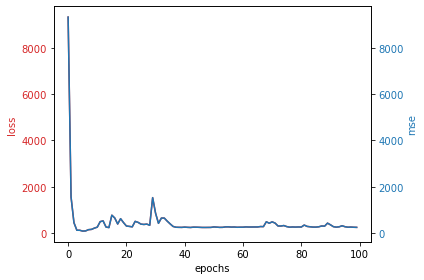

In [12]:
# summarize history for accuracy and loss as a function of the epochs
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color=color)
ax1.plot(history.history['loss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('mse', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['mse'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [13]:
y_pred = model.predict(X_train)

In [14]:
for i in range(len(y_train)):
    
    print('Actual : '+ str(y_train[i])+' -- Pres : '+str(y_pred[i]))

Actual : 142.0 -- Pres : [146.46754]
Actual : 79.0 -- Pres : [79.35663]
Actual : 126.0 -- Pres : [126.552315]
Actual : 82.0 -- Pres : [81.59377]
Actual : 99.0 -- Pres : [98.37879]
Actual : 83.0 -- Pres : [85.98033]
Actual : 49.0 -- Pres : [47.468544]
Actual : 167.0 -- Pres : [170.80647]
Actual : 147.0 -- Pres : [148.08017]
Actual : 170.0 -- Pres : [176.85469]
Actual : 94.0 -- Pres : [93.64587]
Actual : 0.0 -- Pres : [0.09212313]
Actual : 118.3 -- Pres : [120.40989]
Actual : 104.0 -- Pres : [103.626305]
Actual : 197.0 -- Pres : [199.07478]
Actual : 118.3 -- Pres : [120.18164]
Actual : 62.0 -- Pres : [60.81077]
Actual : 46.0 -- Pres : [43.14959]
Actual : 81.0 -- Pres : [78.93516]
Actual : 56.0 -- Pres : [44.887054]
Actual : 120.0 -- Pres : [119.510124]
Actual : 185.0 -- Pres : [191.55943]
Actual : 207.0 -- Pres : [207.76208]
Actual : 112.0 -- Pres : [111.3392]
Actual : 137.0 -- Pres : [139.8619]
Actual : 0.0 -- Pres : [0.09212313]
Actual : 33.0 -- Pres : [32.201614]
Actual : 219.5 -- Pre

In [15]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('racerModel_210624.h5') 

In [17]:
X = X_test[0]

In [18]:
XX = np.array([X])

In [19]:
XX.shape

(1, 20, 224, 3)

In [20]:
y_pred = model.predict(XX)

In [21]:
y_pred[0][0]

117.16452

In [15]:
model.save('saved_model/my_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [16]:
new_model = tf.keras.models.load_model('saved_model/my_model')


In [22]:
y_pred = new_model.predict(XX)
y_pred[0][0]

117.16452